# Занятие 4. Исключения, библиотеки, стиль-паттерны

## Исключения

Исключения - это объекты, вызываемые для остановки работы программы с сообщением о том, что произошла ошибка

In [1]:
1 / 0

ZeroDivisionError: division by zero

In [5]:
positive_number = int(input("Введите положительное число: "))
if positive_number <= 0:
    raise Exception("Я же просил положительное число :(")
print(positive_number ** (1 / 2))

Введите положительное число:  16


4.0


### Классы исключений 

Исключения в Python являются классами ошибок. В Python есть много стандартных исключений. Они имеют определённую иерархию за счёт механизма наследования классов. Все исключения являются потомками базового класса BaseException

В документации Python версии 3.10.8 приводится следующее дерево иерархии стандартных исключений:
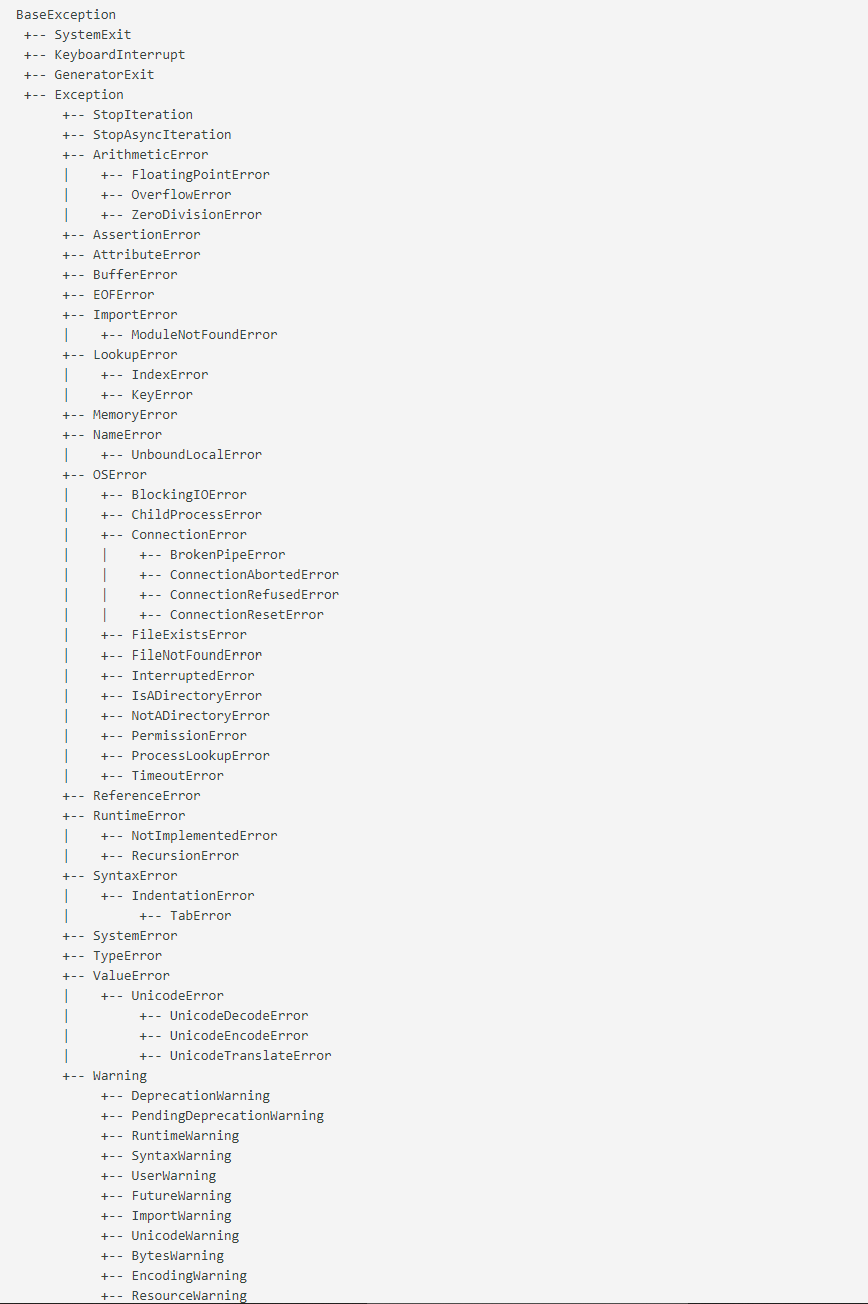

### try-except-finally

С помощью конструкции try-except-finally можно отлавливать и обрабатывать исключения в формате:

```python
try:
    <code>
except <exception1> as <err name>:
    <code>
except <exception2> as <err name>:
    <code>
else:
    <code>  # выполняется, если не вызвано исключение в блоке try
finally:
    <code>  # выполняется всегда
```

In [ ]:
cities = {"Saint-Petersburg": 2, "Kazan": 2, "Suzdal": 1}
try:
    city = input()
    print(f"В городе {city} я был {cities[city]} раз")
except KeyError as err:
    print(f"В городе {city} я еще не был")

In [16]:
try:
    positive_number = 1 / int(input("Введите положительное число: "))  # а что если 0 или строка?
    print(positive_number ** (1 / 2))
except ZeroDivisionError:
    print("Обработка ошибки деления на 0...")
except ValueError:
    print("Обработка ошибки ввода строки...")
else:
    print("Ошибка не произошла")
finally:  
    print("А я выполнюсь в любом случае")

Введите положительное число:  2


0.7071067811865476
Ошибка не произошла
А я выполнюсь в любом случае


In [18]:
try:
    positive_number = 1 / int(input("Введите положительное число: "))  # а что если 0 или строка?
    print(positive_number ** (1 / 2))
except BaseException:
    print("Неизвестная ошибка...")
except ZeroDivisionError:
    print("Обработка ошибки деления на 0...")
except ValueError:
    print("Обработка ошибки ввода строки...")

Введите положительное число:  qw


Неизвестная ошибка...


In [19]:
try:
    positive_number = 1 / int(input("Введите положительное число: "))  # а что если 0 или строка?
    print(positive_number ** (1 / 2))
except ZeroDivisionError as err:
    print(f"Произошла ошибка:\n{err.__class__.__name__}: {err}")
except ValueError as err:
    print(f"Произошла ошибка:\n{err.__class__.__name__}: {err}")
except BaseException as err:
    print(f"Произошла ошибка:\n{err.__class__.__name__}: {err}")

Введите положительное число:  0


Произошла ошибка:
ZeroDivisionError: division by zero


### Собственные исключения

In [30]:
class NonAdminError(AttributeError):
    def __str__(self):
        return "У вас нет доступа к этому функционалу"

admins = {"Peter", "Yaroslav", "Artem", "Andrew", "Stepan"}
person = input("Введите имя администратора: ")
if person not in admins:
    raise NonAdminError
print(person, "- администратор курса")

Введите имя администратора:  Peter


Peter - администратор курса


### EAFP vs LBYL

`EAFP - Easier to ask for forgiveness than permission.`

Проще попросить прощения, чем спросить разрешения.
Это принцип, согласно которому проще обработать исключения, если оно появится, чем выяснять каждый раз, не сработает ли оно.

`LBYL - Look before you leap.`

Осматривайся перед прыжком.
Это же принцип наоборот, гласит о том, что лучше сначала проверить на отсутствие ошибок, а уже потом выполнять функцию.

In [37]:
cities = ["Saint-Petersburg", "Kazan", "Saint-Petersburg", "Suzdal", "Kazan"] 
city_id = int(input())

 6


In [38]:
# EAFP
try:
    print(f"Город №{city_id} в моем путешествии: {cities[city_id - 1]}")
except IndexError as err:
    print(f"Я еще не посещал столько городов")

Я еще не посещал столько городов


In [39]:
# LBYL
if city_id < len(cities):
    print(f"Город №{city_id} в моем путешествии: {cities[city_id - 1]}")
else:
    print(f"Я еще не посещал столько городов")

Я еще не посещал столько городов


#### Зачем EAFP?
1. Обычно эффективнее - если исключение возбуждается редко, то это быстрее, чем проверять наличие ключа каждый раз (особенно с [Zero-Сost Exceptions](https://realpython.com/python311-new-features/#zero-cost-exceptions) в Python 3.11+)
2. Безопаснее 
3. Читабельнее

import timeit

s = []

s.append(
    """\
try:
    x = D['key']
except KeyError:
    x = None
"""
)

s.append(
    """\
x = D['key'] if 'key' in D else None
"""
)

s.append(
    """\
try:
    x = D['xxx']
except KeyError:
    x = None
"""
)

s.append(
    """\
x = D['xxx'] if 'xxx' in D else None
"""
)

for i, c in enumerate(s, 1):
    t = timeit.Timer(c, "D={'key':'value'}")
    print("Run", i, "=", min(t.repeat()))

## Модули, пакеты, библиотеки

* Модуль - это файл, содержащий код с питоном с расширением .py. Модули можно подключать в других файлах.
* Пакет - на практике любая папка, которая содержит файл __init__.py. (С версии Python 3.3 любая папка (даже без __init__.py) считается пакетом). Состоит из модулей.
* Библиотека - общий термин, чаще понимают как набор пакетов и модулей, иногда как то же самое, что и пакет или модуль
  
В дальнейшем, для краткости будем использовать общий термин модуль

Модули бывают:

1. Встроенные. Идут вместе с питоном 
2. Сторонние. Требуют установки 
3. Локальные. То есть те, что созданы внутри данного проекта

In [13]:
# В Python есть несколько способов подключения модулей: 
import random
import datetime as dt
from math import *  # плохо

def hello(name):
    return f"Привет, {name}!"

def count_beauty(name):
    beauty = round(dt.datetime.now().timestamp() * random.randint(1, 10)) % 10
    return f"Красота вашего имени: {beauty}"
    
# print(hello(input("Введите своё имя: ")))  что произойдет при импорте?
if __name__ == "__main__":
    name = input("Введите своё имя: ")
    print(hello(name))
    print(count_beauty(name))

Введите своё имя:  afasf


Привет, afasf!
Красота вашего имени: 2


### Абсолютный и относительный импорты

Пусть наш проект выглядит следующим образом:

### Порядок разрешения импорта

```import abc```

1. Поиск **пакета** abc в том пакете, где лежит модуль, в котором исполняется импорт
2. Поиск **модуля** abc в том пакете, где лежит модуль, в котором исполняется импорт
3. Поиск **встроенного** модуля abc
4. Поиск **пакета** abc в каталогах, указанных в sys.path
5. Поиск **модуля** abc в каталогах, указанных в sys.path

### Полезные команды pip

- `pip freeze`  # получение текущих версий пакетов,
- `pip install -r requirements.txt`  # установка из файла
- `pip install -U numpy`  # обновление
- `pip install git+https://github.com/teadove/teleout`  # установка с гита

## Полезные материалы

1. Что нового в [Python 3.11](https://realpython.com/python311-new-features/#zero-cost-exceptions) (в том числе Zero-Cost Exceptions) и недавно вышедшем [Python 3.12](https://habr.com/ru/companies/selectel/articles/761914/)
2. Подробнее про работу с исключениями [тут](https://pythonchik.ru/osnovy/python-try-except) и [тут](https://habr.com/ru/companies/piter/articles/537642/)